# QoS Prediction Model Development

In [24]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load & inspect data

In [5]:
df = pd.read_csv("data/qws2.txt", delimiter=",", skiprows=31, on_bad_lines="skip")

print(df.head())


    302.75  89   7.1   90  73   78  80  187.75  32       MAPPMatching  \
0   482.00  85  16.0   95  73  100  84    1.00   2          Compound2   
1  3321.40  89   1.4   96  73   78  80    2.60  96           USDAData   
2   126.17  98  12.0  100  67   78  82   22.77  89  GBNIRHolidayDates   
3   107.00  87   1.9   95  73   89  62   58.33  93           CasUsers   
4   107.57  80   1.7   81  67   78  82   18.21  61           interop2   

  http://xml.assessment.com/service/MAPPMatching.asmx?wsdl  
0  http://www.mssoapinterop.org/asmx/WSDL/compoun...        
1  http://www.strikeiron.com/webservices/usdadata...        
2  http://www.holidaywebservice.com/Holidays/GBNI...        
3  http://galex.stsci.edu/casjobs/CasUsers.asmx?WSDL        
4  http://websrv.cs.fsu.edu/~engelen/interop2_2.wsdl        


Header creation

In [8]:

df.columns = [
    "ResponseTime", "Availability", "Throughput", "Successability",
    "Reliability", "Compliance", "BestPractices", "Latency", "Documentation",
    "ServiceName", "WSDLAddress"
]

print(df.head())


   ResponseTime  Availability  Throughput  Successability  Reliability  \
0        482.00            85        16.0              95           73   
1       3321.40            89         1.4              96           73   
2        126.17            98        12.0             100           67   
3        107.00            87         1.9              95           73   
4        107.57            80         1.7              81           67   

   Compliance  BestPractices  Latency  Documentation        ServiceName  \
0         100             84     1.00              2          Compound2   
1          78             80     2.60             96           USDAData   
2          78             82    22.77             89  GBNIRHolidayDates   
3          89             62    58.33             93           CasUsers   
4          78             82    18.21             61           interop2   

                                         WSDLAddress  
0  http://www.mssoapinterop.org/asmx/WSDL/compoun

### Data exploration

In [17]:
print(df.shape)    

(2504, 11)


In [13]:
print(df.dtypes)

ResponseTime      float64
Availability        int64
Throughput        float64
Successability      int64
Reliability         int64
Compliance          int64
BestPractices       int64
Latency           float64
Documentation       int64
ServiceName        object
WSDLAddress        object
dtype: object


In [12]:
print(df.isnull().sum())

ResponseTime      0
Availability      0
Throughput        0
Successability    0
Reliability       0
Compliance        0
BestPractices     0
Latency           0
Documentation     0
ServiceName       0
WSDLAddress       0
dtype: int64


In [14]:
def is_duplicated(row):
    return row.duplicated().any()

duplicated_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicated_rows)}")

Number of duplicate rows: 0


Distribution 

In [18]:
print(df.describe())

       ResponseTime  Availability   Throughput  Successability  Reliability  \
count   2504.000000   2504.000000  2504.000000     2504.000000  2504.000000   
mean     384.044389     81.156949     9.032508       83.901358    69.779553   
std      564.660121     18.704777     7.734074       19.905436     8.579685   
min       37.000000      7.000000     0.100000        8.000000    33.000000   
25%      142.417500     75.000000     2.800000       76.000000    67.000000   
50%      226.800000     87.000000     6.900000       95.000000    73.000000   
75%      349.017500     93.000000    13.300000       98.000000    73.000000   
max     4989.670000    100.000000    43.100000      100.000000    89.000000   

       Compliance  BestPractices      Latency  Documentation  
count  2504.00000    2504.000000  2504.000000    2504.000000  
mean     88.43730      79.303514    54.645671      31.339457  
std      10.02558       7.820380   191.801888      31.520462  
min      33.00000      50.000000    

Histogram

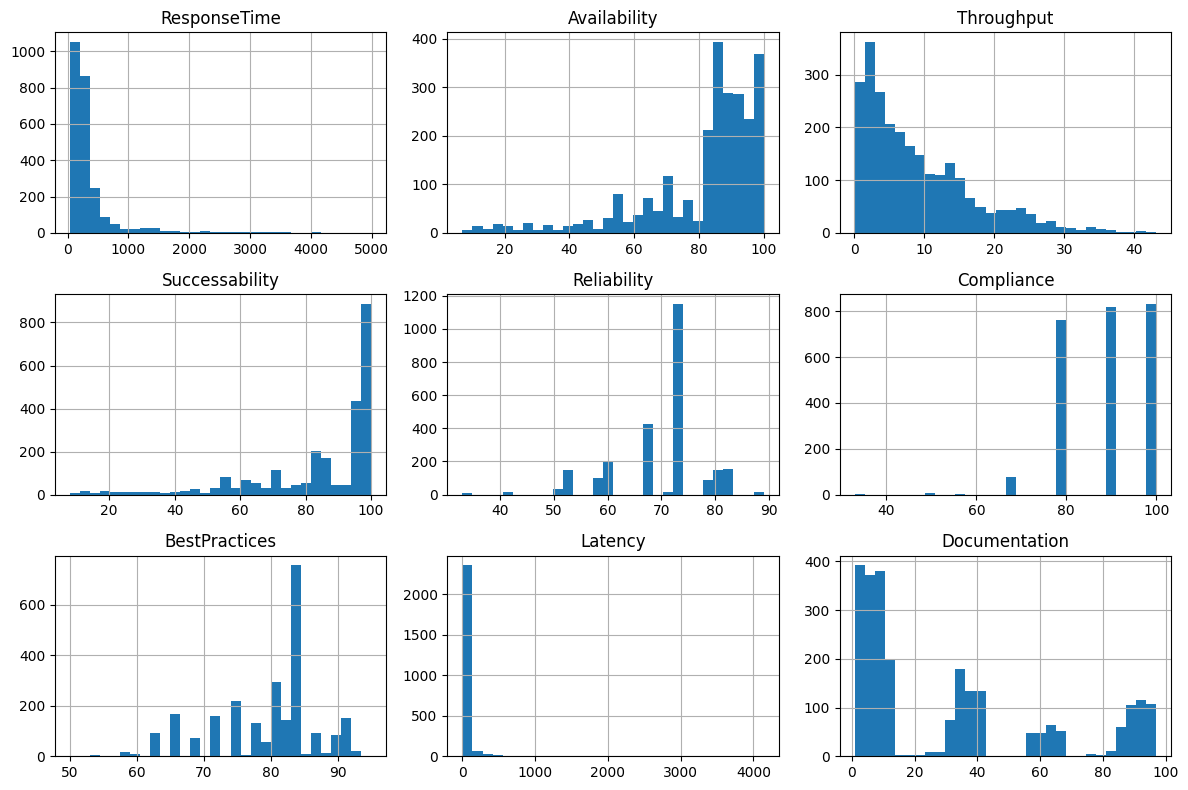

In [21]:
df.hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

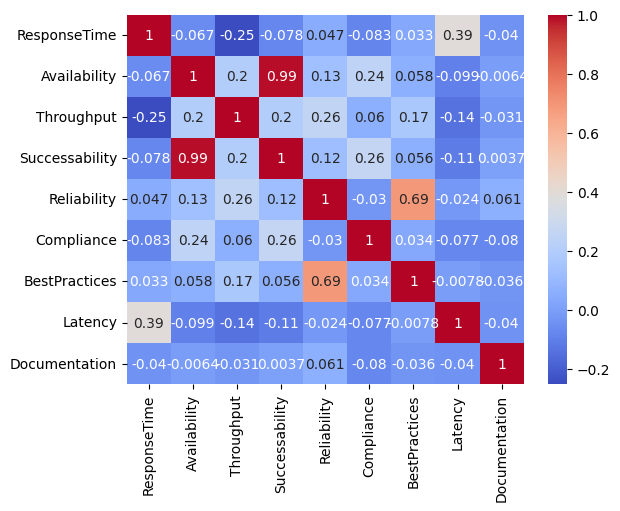

In [26]:
corr = df.iloc[:, :9].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()